In [1]:
from dataeval._internal.datasets import MNIST
from dataeval.metrics.estimators import ber, divergence
from dataeval.utils.torch import read_dataset

In [3]:
train_ds = MNIST(root="../data/", train=True, download=True, flatten=True)
train_cr = MNIST(root="../data/", train=True, download=True, flatten=True, corruption="translate")

Files already downloaded and verified


In [4]:
len(train_ds)

54210

In [8]:
images, labels = read_dataset(train_ds)
len(images)   

54210

In [63]:
import numpy as np

m = len(images)
steps = sorted(m - np.geomspace(m/10, m/1.5, 10, dtype=np.uint))
print(steps)

[18070, 24939, 30502, 35008, 38658, 41614, 44008, 45947, 47517, 48789]


In [64]:
results = {}
for s in steps:
    results[s] = ber(images[:s], labels[:s])

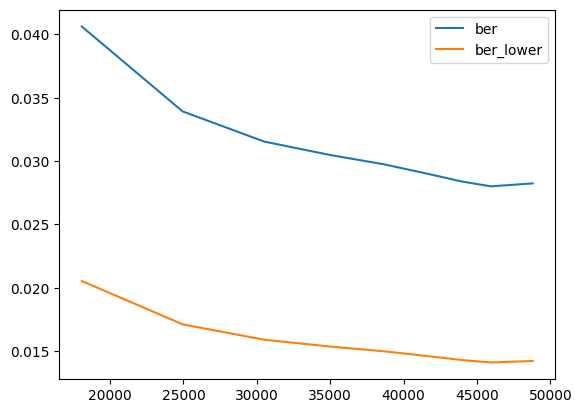

In [65]:
import matplotlib.pyplot as plt

plt.plot(list(results), [v.ber for v in results.values()], label="ber")
plt.plot(list(results), [v.ber_lower for v in results.values()], label="ber_lower")
plt.legend()
plt.show()